# Analysis for training A2C on CartPole-v0

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

## Analyse training results

In [10]:
training_results_df = pd.read_csv("training_results_20210407-003658.csv")
training_results_df.head(3)

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
0,0,20210407-003658,127.935775,6,50000,0.001,"(32, 32)",14.9,119.6,72.662,25.978005,-0.107228,2.421044,-3.228996,2.310600
1,1,20210407-003658,125.215379,6,50000,0.001,"(64, 64)",16.5,148.4,90.462,30.421196,-0.107516,2.086534,-3.176658,1.975838
2,2,20210407-003658,128.042971,6,50000,0.001,"(128, 128)",15.4,142.1,98.764,27.709347,-0.107310,1.892873,-3.167362,1.782418


In [11]:
training_results_df["reward_variance"].describe()

count    54.000000
mean     33.264907
std       4.634868
min      23.730288
25%      30.337798
50%      33.128667
75%      36.004535
max      45.285102
Name: reward_variance, dtype: float64

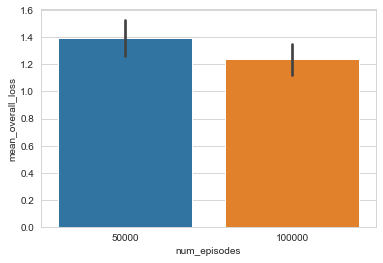

In [12]:
# sns.barplot(data=training_results_df, x="num_episodes", y="reward_variance");
# sns.barplot(data=training_results_df, x="num_episodes", y="max_reward");
# sns.barplot(data=training_results_df, x="num_episodes", y="mean_reward");
sns.barplot(data=training_results_df, x="num_episodes", y="mean_overall_loss");

# Notes: not sure, not very exciting

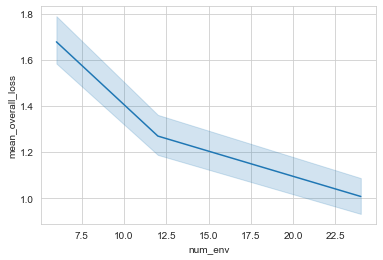

In [13]:
# sns.lineplot(data=training_results_df, x="num_env", y="reward_variance");
# sns.lineplot(data=training_results_df, x="num_env", y="max_reward");
# sns.lineplot(data=training_results_df, x="num_env", y="mean_reward");
sns.lineplot(data=training_results_df, x="num_env", y="mean_overall_loss");

# Notes: High num_envs = lowest overall loss, highest mean and max reward, but highest variance

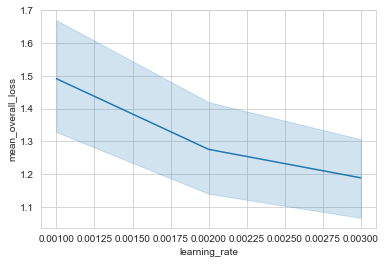

In [14]:
# sns.lineplot(data=training_results_df, x="learning_rate", y="reward_variance");
# sns.lineplot(data=training_results_df, x="learning_rate", y="max_reward");
# sns.lineplot(data=training_results_df, x="learning_rate", y="mean_reward");
sns.lineplot(data=training_results_df, x="learning_rate", y="mean_overall_loss");

# Note: Learning rate seems to have achieved a better loss when it was higher.

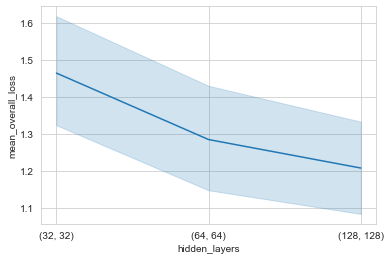

In [15]:
# sns.lineplot(data=training_results_df, x="hidden_layers", y="reward_variance");
# sns.lineplot(data=training_results_df, x="hidden_layers", y="max_reward");
# sns.lineplot(data=training_results_df, x="hidden_layers", y="mean_reward");
sns.lineplot(data=training_results_df, x="hidden_layers", y="mean_overall_loss");

# Note: (128, 128)  didn't seem to be a great return on reducing loss and increasing rewards or consistency of rewards <-- compare wall time

In [16]:
# Understand the min-max or ranges of each column
# Notes: which was the major contributor to mean overall loss? Critic loss. Is that a good thing or bad?
training_results_df.describe()

,index,wall_time,num_env,num_episodes,learning_rate,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,249.775966,14.000000,75000.000000,0.002000,22.648148,180.142593,116.713481,33.264907,-0.064967,1.386653,-3.083281,1.318598
std,15.732133,99.576889,7.553582,25234.746934,0.000824,5.675227,18.011051,16.161215,4.634868,0.039937,0.371981,0.052588,0.340634
min,0.000000,125.215379,6.000000,50000.000000,0.001000,14.100000,119.600000,72.662000,23.730288,-0.131164,0.801398,-3.228996,0.775860
25%,13.250000,160.827822,6.000000,50000.000000,0.001000,18.225000,169.250000,104.171250,30.337798,-0.107290,1.109214,-3.110827,1.043062
50%,26.500000,230.602507,12.000000,75000.000000,0.002000,21.100000,184.100000,120.631000,33.128667,-0.063878,1.314386,-3.084402,1.246732
75%,39.750000,316.557476,24.000000,100000.000000,0.003000,27.200000,195.025000,129.024000,36.004535,-0.023945,1.648924,-3.047157,1.531867
max,53.000000,428.945427,24.000000,100000.000000,0.003000,35.300000,200.000000,141.977000,45.285102,0.005607,2.421044,-2.969989,2.310600


In [17]:
training_results_df.sort_values(by=["mean_overall_loss", "max_reward"], ascending=True).head(5)
# training_results_df.sort_values(by=["mean_overall_loss", "mean_reward"], ascending=True).head(5)
training_results_df.sort_values(by=["max_reward"], ascending=False).head(5)

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
41,41,20210407-003658,220.331890,24,50000,0.002,"(128, 128)",32.0,200.0,136.398,35.973565,-0.018014,0.966676,-3.052189,0.945611
52,52,20210407-003658,425.197523,24,100000,0.003,"(64, 64)",33.8,200.0,136.419,30.352241,-0.024287,0.852941,-3.030353,0.825634
50,50,20210407-003658,428.945427,24,100000,0.002,"(128, 128)",27.2,200.0,141.977,32.011772,-0.023831,0.841115,-3.046613,0.814258
7,7,20210407-003658,131.239903,6,50000,0.003,"(64, 64)",15.9,200.0,110.438,33.317160,-0.100121,1.576740,-3.095475,1.473519
46,46,20210407-003658,424.082354,24,100000,0.001,"(64, 64)",17.9,200.0,135.958,37.312031,-0.021532,1.032933,-3.064428,1.008314
